<a href="https://colab.research.google.com/github/Adityan1512/Coursework-Codes/blob/main/Dissertation_Survey_Responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Survey Form Dataset/Dissertation (Responses) - Form Responses 1.csv', encoding='latin-1')

In [56]:
df.head(5)

,Timestamp,"Do you give your informed consent to participate in this survey, acknowledging the terms provided regarding data security and confidentiality?",Name,Age,Gender,Primary Occupation,Which type of bank do you use on a day-to-day basis ?,"On a scale of 1 to 5, how would you rate your overall satisfaction with your primary bank?",What features do you find most valuable in your primary bank?,What types of transactions do you typically conduct through your Neo Bank ?,...,Do you believe that Neo Banks adhere to regulatory standards as strictly as traditional banks ?,How important is it to you that your bank complies with regulatory standards ?,Did the COVID-19 pandemic change your banking habits or preferences ?,"During the COVID-19 pandemic, how often did you use digital banking services compared to before ?",Which of the following services did you find most useful from your Neo Bank during the COVID-19 pandemic ?,Do you believe Neo Banks will significantly disrupt traditional banking in the next 5 years ?,"In your opinion, will Neo Banks and traditional banks coexist or will one dominate the market ?",Do you believe Neo Banks have improved financial inclusion for underserved populations ?,What do you think is the future role of Neo Banks in the financial industry ?,Any suggestions or comments on how Neo Banks can enhance their services ?
0,8/19/2024 9:52:13,"Yes, I give my informed consent",Ajinkya Kadam,25-34,Male,Student,Both Equally,5,"Convenience, Low Fees, Security","Day-to-Day Food, Grocery Payments, Day-to-Day ...",...,No,7,"Yes, I now prefer Neo Banks",Much more frequently,Contactless payments,No,Co-Exist,No,It will grow and acquire some share of tradion...,None
1,8/19/2024 9:57:19,"Yes, I give my informed consent",Hajarat Oloko,25-34,Female,Student,"Neo Banks (Revolut, Monzo, Starling)",7,"Convenience, Low Fees, Innovative Features","Day-to-Day Food, Grocery Payments, Day-to-Day ...",...,No,7,"Yes, I now prefer Neo Banks",Less frequently,Digital customer support,Yes,Neo Banks will Dominate,Yes,NaN,NaN
2,8/19/2024 10:00:41,"Yes, I give my informed consent",Jan,18-24,Male,Student,"Traditional Bank (Barclays, Lloyds, Metro, etc.)",7,Innovative Features,I don't use a Neo Bank,...,Yes,7,"No, my preferences remained the same",Less frequently,Not Applicable,Yes,Neo Banks will Dominate,Yes,Main leader in the sector,NaN
3,8/19/2024 10:37:02,"Yes, I give my informed consent",Elsa,35-44,Female,Student,Both Equally,7,Customer Service,"Day-to-Day Food, Grocery Payments, Day-to-Day ...",...,Yes,7,"No, my preferences remained the same",I did not use digital banking before or during...,Contactless payments,Yes,Neo Banks will Dominate,Yes,NaN,NaN
4,8/19/2024 10:47:30,"Yes, I give my informed consent",Wube Asfaw,35-44,Female,Student,Both Equally,7,Convenience,Savings and investments,...,Unsure,7,"No, my preferences remained the same",Somewhat more frequently,Remote investment management,Yes,Co-Exist,Yes,push the whole eco-system to become more innov...,NaN


In [57]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 31 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                          --------------  ----- 
 0   Timestamp                                                                                                                                       49 non-null     object
 1   Do you give your informed consent to participate in this survey, acknowledging the terms provided regarding data security and confidentiality?  49 non-null     object
 2   Name                                                                                                                                            49 non-null     object
 3   Age                             

In [58]:
label_encoder = LabelEncoder()
temp = df['Which type of bank do you use on a day-to-day basis ?'].apply(lambda x: 'Positive' if 'Neo' in x or 'Both' in x else 'Negative')
df['Bank_Type_Encoded'] = label_encoder.fit_transform(temp)

In [59]:
df = df.drop('Timestamp', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


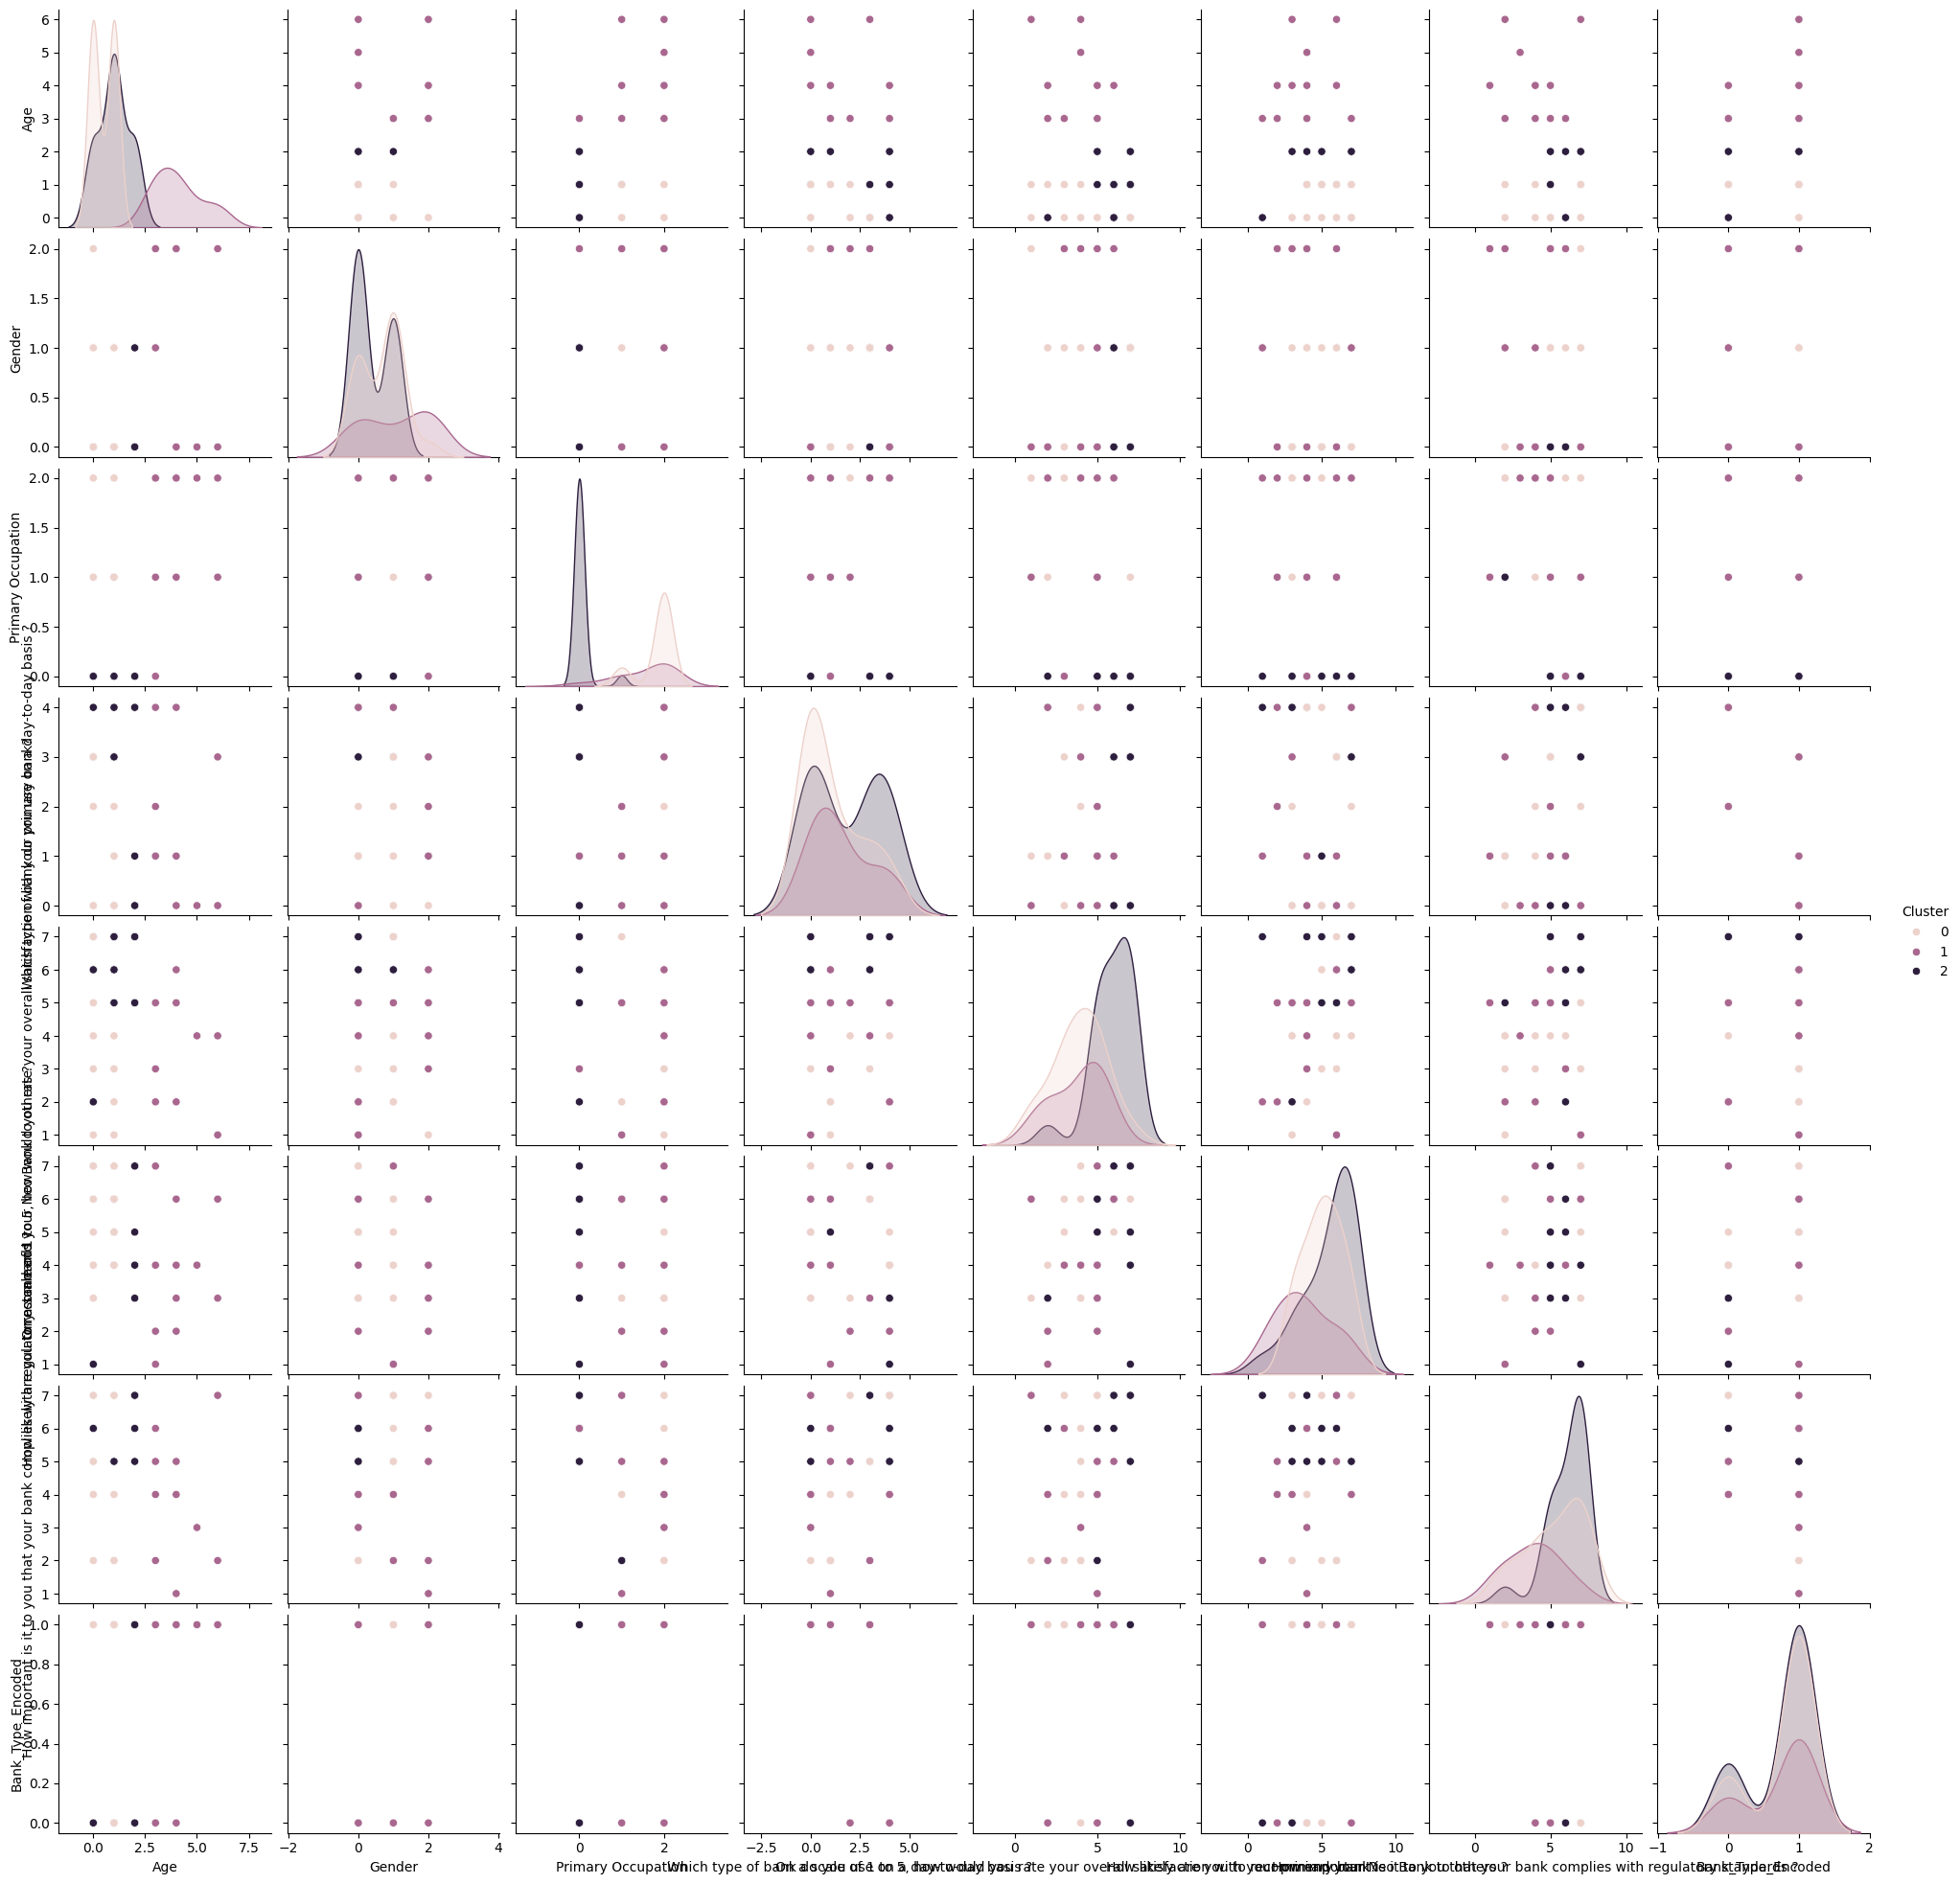

In [60]:
# Encode categorical data for clustering
for col in ['Age','Gender', 'Primary Occupation', 'Which type of bank do you use on a day-to-day basis ?']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Selecting features for clustering
features = df[['Age', 'Gender', 'Primary Occupation']]  # Adjust according to your data columns

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

# Analyze clusters
sns.pairplot(df, hue='Cluster')
plt.show()

In [64]:
df.columns

Index(['Do you give your informed consent to participate in this survey, acknowledging the terms provided regarding data security and confidentiality?',
       'Name', 'Age', 'Gender', 'Primary Occupation',
       'Which type of bank do you use on a day-to-day basis ?',
       'On a scale of 1 to 5, how would you rate your overall satisfaction with your primary bank? ',
       'What features do you find most valuable in your primary bank? ',
       'What types of transactions do you typically conduct through your Neo Bank ?',
       'Which specific features of your Neo Bank do you find most beneficial? ',
       'Which technology features do you find most beneficial in your Neo Bank ? ',
       'How would you rate the technological advancements of Neo Banks compared to traditional banks ?',
       'What motivated you / What would motivate you to choose a Neo Bank over a traditional bank ?',
       'What aspects of traditional banks do you think Neo Banks have improved upon? ',
       '

In [65]:
# Prepare data for decision tree
X = df[['Age', 'Gender', 'Primary Occupation', 'How frequently do you use your Neo Bankâs services compared to your traditional bank ?']]
y = df['Bank_Type_Encoded']  # Make sure this is binary or appropriately encoded

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the tree
import graphviz
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['Traditional', 'Neo'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

[[2 1]
 [0 7]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



'decision_tree.pdf'